# LU3IN003 - Algortihmique : Projet Tomographie 
#### *SOUAIBY Christina 21102782 | SAMAHA Elio 21105733*

In [1]:
#bibliotheques
import copy
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
#from timeout_decorator import timeout
#from multiprocessing import Process, Queue
#import concurrent.futures
#from multiprocessing import Process, Manager

In [16]:
#fonctions auxiliaires
def readstr(file):
  return file.readline().strip()

def readint(file):
  return int(readstr(file))

def readints(file):
  return list(map(int, readstr(file).split()))

N.B: 
- Dans certaines fonctions, nous avons fait le choix de rajouter des paramètres dans le but de faciliter l'implémentation.
- L'explication en commentaire est concise. Plus de détails sont présents dans le rapport pour clarifier le code.

## 1 Méthode incomplète de résolution

### 1.1 Première étape

In [17]:
#question 4
def T(j, l, lookup={}):
    # Vérifier si le résultat pour cette paire (j, l) a déjà été calculé
    if (j, l) in lookup:
        return lookup[(j, l)]

    # Cas de base : pas de bloc à colorier
    if l == 0:
        # Vérifier si la case j est dans les limites de la grille
        if 0 <= j <= M - 1:
            return True
        return False
    elif l >= 1:
        # Cas où j < s_l - 1
        if j < S[l - 1] - 1:
            return False
        # Cas où j = s_l - 1
        elif j == S[l - 1] - 1:
            # Retourne True si c'est le seul bloc, sinon False
            return l == 1
        else:
            # Cas où j > s_l - 1
            # Calcul récursif en fonction des deux branches possibles
            
            #explication left_branch : inserer case blanche + essayer de colorier la sequence S sur les j-1 cases
            #explication right_branch : coloration du dernier bloc en noir + inserer case blanche devant
            #                          + essayer de colorier les blocs sans le dernier sur les cases restantes
            
            
            left_branch = T(j - 1, l, lookup)
            right_branch = T(j - S[l - 1] - 1, l - 1, lookup)
            result = left_branch or right_branch

    # Stocker le résultat et le retourner
    lookup[(j, l)] = result
    return result


In [18]:
#tests question 4
M = 10
S = [1 , 2 , 3]
print("q4 test 1: ", T(M-1 , len(S) , {}))

M = 5
S = [1 , 2 , 3]
print("q4 test 2: ", T(M-1 , len(S) , {}))

q4 test 1:  True
q4 test 2:  False


### 1.2 Généralisation

In [19]:
#question 7
def T1(Li, j, l, S, lookup={}):
    M = len(Li)

    # Vérifier si le résultat pour cette paire (j, l) a déjà été calculé
    if (j, l) in lookup:
        return lookup[(j, l)]

    # Cas de base : pas de bloc à colorier
    if l == 0:
        # Vérifier si la case j est dans les limites de la grille
        if -1 <= j <= M - 1:
            # Retourne True si aucune case noire mal placée dans la zone.
            return ("N" not in Li[0:j + 1])
        return False
    elif l >= 1:
        # Cas où j < s_l - 1
        if j < S[l - 1] - 1:
            return False
        # Cas où j = s_l - 1
        elif j == S[l - 1] - 1:
            # Retourne True si c'est le seul bloc et pas de case blanche, False sinon
            return (l == 1) and ("B" not in Li[0:j + 1])
        else:
            # Cas où j > s_l - 1
            
            # (*) explication left_branch : inserer case blanche + essayer de colorier la sequence S sur les j-1 cases
            # (**) explication right_branch : coloration du dernier bloc en noir + inserer case blanche devant
            #                          + essayer de colorier les blocs sans le dernier sur les cases restantes
            
            
            #derniere case incolore
            if Li[j] == "I": 
                
                # Vérifier s'il y a une case blanche mal dans la zone à colorier + s'il y a une case noire mal placée après 
                N = 0
                for i in range(S[l - 1]):
                    if Li[j - i] == "N":
                        N += 1
                    if Li[j - i] == "B":
                        if N > 0:
                            return False
                        else:
                            result = T1(Li, j - i - 1, l, S, lookup)
                            lookup[(j, l)] = result
                            return result

                # Verifier si la case avant le bloc est noire, qui nous contraint a utiliser left_branch (*)
                if Li[j - S[l - 1]] == "N":
                    left_branch = T1(Li, j - 1, l, S, lookup)
                    result = left_branch
                    
                #sinon on a le choix entre left_branch (*) et right_branch (**)
                else:
                    # Calcul récursif en fonction des deux branches possibles
                    left_branch = T1(Li, j - 1, l, S, lookup)
                    right_branch = T1(Li, j - S[l - 1] - 1, l - 1, S, lookup)
                    result = left_branch or right_branch
                    
                    
            #derniere case blanche : il faut absolument utiliser left_branch (*)
            elif Li[j] == "B": 
                left_branch = T1(Li, j - 1, l, S, lookup)
                result = left_branch
                
                
            #derniere case noire
            elif Li[j] == "N": 
            
                # Vérifier s'il y a une case blanche mal placée dans la zone à colorier,
                # ou la la case avant le bloc est noire, qui nous fait une case noire en trop dans le bloc
                if ("B" in Li[j - S[l - 1] + 1:j]) or (Li[j - S[l - 1]] == "N"):
                    return False
                
                #sinon on a le choix entre left_branch (*) et right_branch (**)
                else:
                    right_branch = T1(Li, j - S[l - 1] - 1, l - 1, S, lookup)
                    result = right_branch

    # Stocker le résultat et le retourner
    lookup[(j, l)] = result
    return result

### 1.3 Propagation

In [20]:
#question 9 auxiliaires
def ColoreLig(G, k, s, nouveaux):
    
    L = copy.deepcopy(G[k])
    M = len(L)
    j = M - 1
    l = len(s)
    
    for i in range(M):
        if L[i] == "I":
            # Tester en coloriant la case en noir
            L[i] = "B"
            test_blanc = T1(L, j, l, s, {})
            
            # Tester en coloriant la case en blanc
            L[i] = "N"
            test_noir = T1(L, j, l, s, {})
            
            # Réinitialiser la case puis agir en fonction des tests
            L[i] = "I"
            
            # Impossible de colorier en noir ou en blanc
            if not test_noir and not test_blanc:
                return (False, G)  
            
            # Colorier la case en noir dans la grille et mettre à jour l'ensemble de nouveaux
            elif test_noir and not test_blanc:
                L[i] = "N"
                G[k][i] = "N"
                nouveaux.add(i)
                
            # Colorier la case en blanc dans la grille et mettre à jour l'ensemble de nouveaux
            elif test_blanc and not test_noir:
                L[i] = "B"
                G[k][i] = "B"
                nouveaux.add(i)
            
            #sinon (les 2 tests passent) on ne sait pas quoi choisir donc on garde la case incolore
        else :
            if not T1(L, j, l, s, {}):
                return (False, G)
    return (True, G)

def ColoreCol(G, k, s, nouveaux):
    
    C = [G[i][k] for i in range(len(G))]
    M = len(C)
    j = M - 1
    l = len(s)
    
    for i in range(M):
        if C[i] == "I":
            # Tester en coloriant la case en noir
            C[i] = "B"
            test_blanc = T1(C, j, l, s, {})
            
            # Tester en coloriant la case en blanc
            C[i] = "N"
            test_noir = T1(C, j, l, s, {})
            
            # Réinitialiser la case puis agir en fonction des tests
            C[i] = "I"
            
            # Impossible de colorier en noir ou en blanc
            if not test_noir and not test_blanc:
                return (False, G)  
            
            # Colorier la case en noir dans la grille et mettre à jour l'ensemble de nouveaux
            elif test_noir and not test_blanc:
                C[i] = "N"
                G[i][k] = "N"
                nouveaux.add(i)
                
            # Colorier la case en blanc dans la grille et mettre à jour l'ensemble de nouveaux
            elif test_blanc and not test_noir:
                C[i] = "B"
                G[i][k] = "B"
                nouveaux.add(i)
                
            #sinon (les 2 tests passent) on ne sait pas quoi choisir donc on garde la case incolore
        else :
            if not T1(C, j, l, s, {}):
                return (False, G)
    return (True, G)


In [21]:
#question 9 lecture
def read_input(file):
  #lecture des lignes brutes du fichier
  with open(file, 'r') as file:
      lines = file.readlines()

  # trouver dans la liste le symbole '#' qui separe les lignes des colonnes
  hash_index = lines.index('#\n')

  # creer les sequences de coloration pour les lignes de la grille
  lines_input = [list(map(int, line.split())) for line in lines[:hash_index]]

  # creer les sequences de coloration pour les colonnes de la grille
  columns_input = [list(map(int, line.split())) for line in lines[hash_index + 1:]]

  G = [["I" for _ in range(len(columns_input))] for _ in range(len(lines_input))]
  return G, lines_input, columns_input


In [22]:
#question 9 coloration
def coloration(A, sL, sC):
    # Créer une copie de la matrice A pour la modifier
    G = copy.deepcopy(A)
    N = len(G)
    M = len(G[0])
    
    # Initialiser les ensembles de lignes et colonnes à colorier
    lignesAvoir = set(range(N))
    colonnesAvoir = set(range(M))
    
    while (lignesAvoir != set() or colonnesAvoir != set()):
        for i in set(lignesAvoir):
            nouveaux_l = set()
            
            # Tenter de colorier la ligne i
            (ok_l, G) = ColoreLig(G, i, sL[i], nouveaux_l)
            
            # Vérifier si la coloration est possible
            if not ok_l:
                return ("FAUX", [["I" for _ in range(M)] for _ in range(N)])
            
            # Mettre à jour les colonnes à colorier
            for a in nouveaux_l:
                colonnesAvoir.add(a)  # Ajouter la colonne si elle n'est pas déjà présente
            lignesAvoir.discard(i)  # Retirer la ligne (si elle etait presente) car elle est maintenant coloriée
            
        # Parcourir les colonnes à colorier
        for j in set(colonnesAvoir):
            nouveaux_c = set()
            
            # Tenter de colorier la colonne j
            (ok_c, G) = ColoreCol(G, j, sC[j], nouveaux_c)
            
            # Vérifier si la coloration est possible
            if not ok_c:
                return ("FAUX", [["I" for _ in range(M)] for _ in range(N)])
            
            # Mettre à jour les lignes à colorier
            for a in nouveaux_c:
                lignesAvoir.add(a)  # Ajouter la ligne si elle n'est pas déjà présente
            colonnesAvoir.discard(j) # Retirer la colonne (si elle etait presente) car elle est maintenant coloriée
    
    # Vérifier si toutes les cases sont coloriées
    if all("I" not in k for k in G):
        return ("VRAI", G)  # La coloration est réussie
    else:
        return ("NESAITPAS", G)  # La coloration est incomplète


In [23]:
#question 9 affichage
def visualiser(nonogram):
    # Définition des couleurs par des tonalités de gris pour la visualisation
    couleurs = {'N': 0, 'B': 1, 'I': 0.5}
    
    # Création d'un tableau numpy pour représenter le nonogramme avec les couleurs définies 
    nonogram_array = np.array([[couleurs[cell] for cell in row] for row in nonogram])
    
    # Utilisation de plt.pcolor pour créer un tracé de couleur en fonction du tableau numpy
    plt.pcolor(nonogram_array, cmap='gray', linewidths=0, vmin=0, vmax=1)
    
    # Inversion de l'axe y pour que le haut de la grille soit affiché en haut
    plt.gca().invert_yaxis()
    
    # Désactivation des axes
    plt.axis('off')
    
    # Ajustement des dimensions pour avoir des carrés
    plt.gca().set_aspect('equal', adjustable='box')
    
    # Affichage de la visualisation du nonogramme
    plt.show()

VRAI


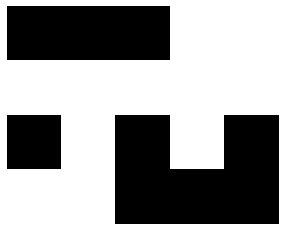

In [24]:
#question 9
def propagation(text_file):
  mat_vide, seq_lig, seq_col = read_input(text_file)
  valide, mat_coloree = coloration(mat_vide, seq_lig, seq_col)
  print(valide)
  visualiser(mat_coloree)

#test question 9
propagation("0.txt")

### 1.4 Tests

VRAI


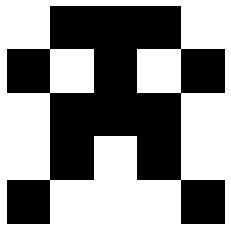

VRAI


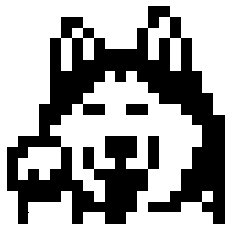

VRAI


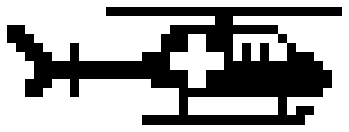

VRAI


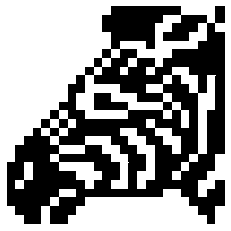

VRAI


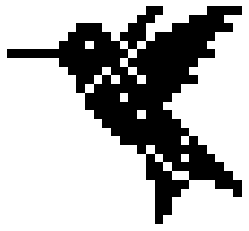

VRAI


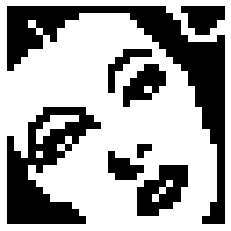

VRAI


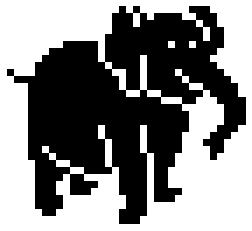

VRAI


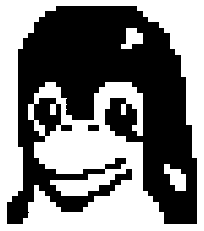

VRAI


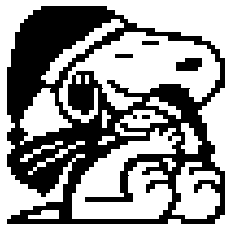

VRAI


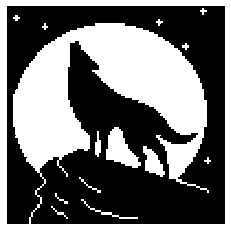

,
Instances 1-10,Temps de résolution de la méthode de propagation (secondes)
1.txt,0.091145
2.txt,0.822569
3.txt,0.682649
4.txt,1.471263
5.txt,1.343043
6.txt,3.316957
7.txt,1.887378
8.txt,3.088097
9.txt,3328.354651


In [35]:
#question 10 tests
def measure_time(func, i, j):
    results = []
    for k in range(i, j + 1):
        start_time = time.time()
        instance_file = f"{k}.txt"
        func(instance_file)
        elapsed_time = time.time() - start_time
        results.append((instance_file, elapsed_time))
    return results

dfp = pd.DataFrame(measure_time(propagation,1,10), columns=["Instances 1-10", "Temps de résolution de la méthode de propagation (secondes)"])
dfp = dfp.set_index( ["Instances 1-10", "Temps de résolution de la méthode de propagation (secondes)"] )
dfp

VRAI


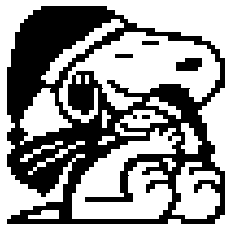

<Figure size 432x288 with 0 Axes>

In [34]:
#question 10 instance 9
propagation("9.txt")
plt.savefig("instance9.png", dpi=300)

NESAITPAS


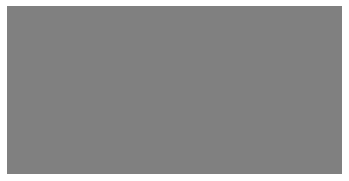

In [15]:
#question 11
propagation("11.txt")

## 2 Méthode complète de résolution

In [25]:
#question 12 coloration
def colorier_et_propager(A, sL, sC, lig, col, c):
    # Créer une copie de la matrice A pour la modifier
    G = copy.deepcopy(A)
    N = len(G)
    M = len(G[0])

    # Modifier la case à la position (lig, col) avec la couleur c
    G[lig][col] = c

    # Initialiser les ensembles de lignes et colonnes à vérifier
    lignesAvoir = {lig}
    colonnesAvoir = {col}

    # Vérifier et propager la coloration jusqu'à ce que toutes les contraintes soient satisfaites
    while (lignesAvoir != set() or colonnesAvoir != set()):
        # Parcourir les lignes à vérifier
        for i in set(lignesAvoir):
            nouveaux_l = set()

            # Tenter de colorier la ligne i
            (ok_l, G) = ColoreLig(G, i, sL[i], nouveaux_l)

            # Vérifier si la coloration est possible
            if not ok_l:
                return ("FAUX", [["I" for _ in range(M)] for _ in range(N)])

            # Mettre à jour les colonnes à vérifier
            for a in nouveaux_l:
                colonnesAvoir.add(a)  # Ajouter la colonne si elle n'est pas déjà présente
            lignesAvoir.discard(i)  # Retirer la ligne (si elle était présente) car elle est maintenant coloriée

        # Parcourir les colonnes à vérifier
        for j in set(colonnesAvoir):
            nouveaux_c = set()

            # Tenter de colorier la colonne j
            (ok_c, G) = ColoreCol(G, j, sC[j], nouveaux_c)

            # Vérifier si la coloration est possible
            if not ok_c:
                return ("FAUX", [["I" for _ in range(M)] for _ in range(N)])

            # Mettre à jour les lignes à vérifier
            for a in nouveaux_c:
                lignesAvoir.add(a)  # Ajouter la ligne si elle n'est pas déjà présente
            colonnesAvoir.discard(j)  # Retirer la colonne (si elle était présente) car elle est maintenant coloriée

    # Vérifier si toutes les cases sont coloriées
    if all("I" not in k for k in G):
        return ("VRAI", G)  # La coloration est réussie
    else:
        return ("NESAITPAS", G)  # La coloration est incomplète


In [27]:
#question 12 appel recursif enumeration
def enum_rec(A, sL, sC, k, c):
    # Créer une copie de la matrice A pour la modifier
    G = copy.deepcopy(A)
    N, M = len(A), len(A[0])

    # Vérifier si toutes les cases ont été coloriées
    if k == N * M:
        return "VRAI"

    # Calculer les indices de ligne et de colonne pour la case actuelle
    i = k // M
    j = k % M

    # Tenter de colorier la case actuelle avec la couleur c et propager la coloration
    ok, G = colorier_et_propager(G, sL, sC, i, j, c)

    # Vérifier si la coloration est impossible
    if ok == "FAUX":
        return ("FAUX", [["I" for _ in range(M)] for _ in range(N)])

    # Vérifier si la coloration est complète
    if ok == "VRAI":
        return ("VRAI", G)

    # Sinon, Trouver la prochaine case indéterminée
    kp = k
    while kp<N*M and G[kp // M][kp % M] != "I":
        kp += 1

    # Enumérer les possibilités de coloration pour la prochaine case avec les couleurs "B" et "N"
    v1, G1 = enum_rec(G, sL, sC, kp, "B")
    if v1 == "VRAI":
        return ("VRAI", G1)

    v2, G2 = enum_rec(G, sL, sC, kp, "N")
    if v2 == "VRAI":
        return ("VRAI", G2)

    # Si aucune coloration n'est possible, retourner "FAUX"
    return ("FAUX", [["I" for _ in range(M)] for _ in range(N)])


In [28]:
#question 12 enumeration
def enumeration(A, sL, sC):
    N, M = len(A), len(A[0])

    # Tenter une première coloration de la matrice
    valide, G = coloration(A, sL, sC)
    
    # Vérifier si la coloration initiale est possible
    if valide == "FAUX":
        return ("FAUX", [["I" for _ in range(M)] for _ in range(N)])
    
    # Vérifier si la coloration initiale est complète
    if valide == "VRAI":
        return ("VRAI", G)

    # Si elle n'est pas complète, trouver la première case dont la coloration n'a pas été déterminée dès l'appel à coloration
    """
    k = 0
    while k<N*M and G[k//M][k%M] != "I":
        k += 1
    """
    # Enumérer les possibilités de coloration à partir de la première case indéterminée en commençant par le blanc 
    v1, G1 = enum_rec(G, sL, sC, 0, "B")
    if v1 == "VRAI":
        return ("VRAI", G1)

    # Si la coloration en commençant par le blanc ne réussit pas, essayer avec le noir
    v2, G2 = enum_rec(G, sL, sC, 0, "N")
    if v2 == "VRAI":
        return ("VRAI", G2)

    # Si aucune coloration n'est possible, retourner "FAUX"
    return ("FAUX", [["I" for _ in range(M)] for _ in range(N)])

In [29]:
#question 12
def resolutionComplete(text_file):
    mat_vide, seq_lig, seq_col = read_input(text_file)
    valide, mat_coloree = enumeration(mat_vide, seq_lig, seq_col)
    print(valide)
    visualiser(mat_coloree)

### 2.1 Implantation et tests

VRAI


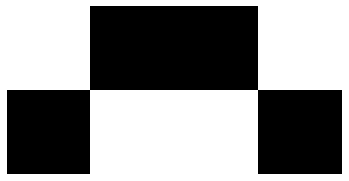

In [30]:
#question 13
resolutionComplete("11.txt")

VRAI


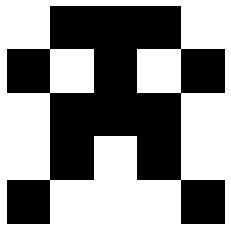

VRAI


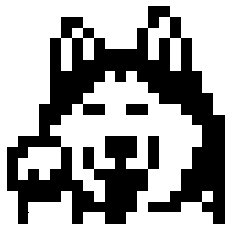

VRAI


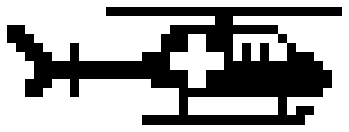

VRAI


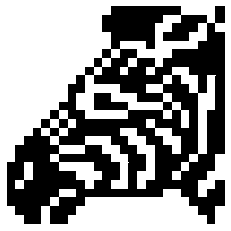

VRAI


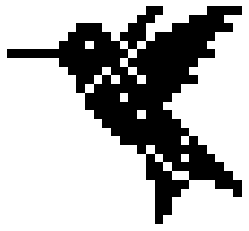

VRAI


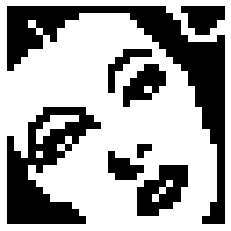

VRAI


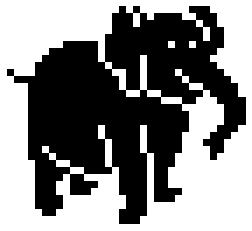

VRAI


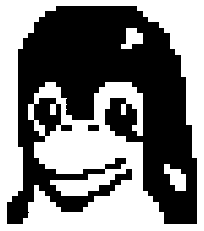

VRAI


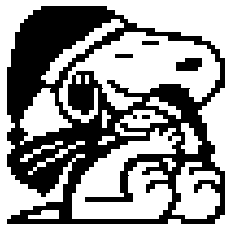

VRAI


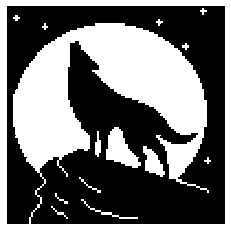

VRAI


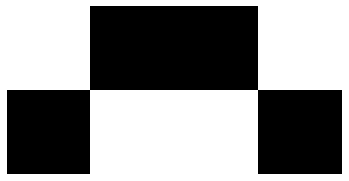

VRAI


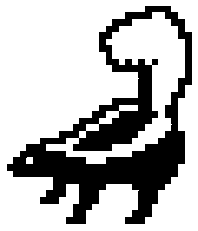

VRAI


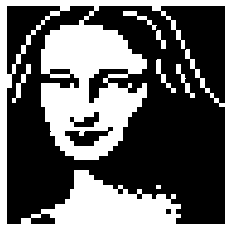

VRAI


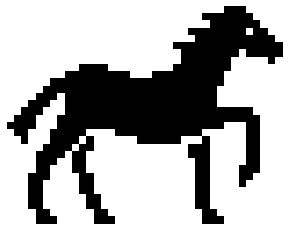

VRAI


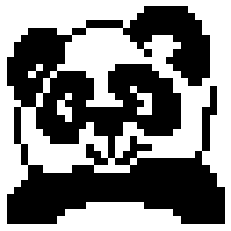

VRAI


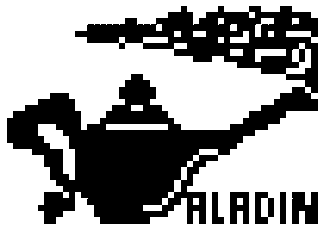

,
Instances 1-16,Temps de résolution de la méthode de résolution complète (secondes)
1.txt,0.148590
2.txt,0.617671
3.txt,0.519528
4.txt,1.114934
5.txt,0.850766
6.txt,2.224494
7.txt,1.307734
8.txt,1.928680
9.txt,29.717954


In [21]:
#question 14 resolution complete 1-16
dfrc = pd.DataFrame(measure_time(resolutionComplete,1,16), columns=["Instances 1-16", "Temps de résolution de la méthode de résolution complète (secondes)"])
dfrc = dfrc.set_index( ["Instances 1-16", "Temps de résolution de la méthode de résolution complète (secondes)"] )
dfrc

NESAITPAS


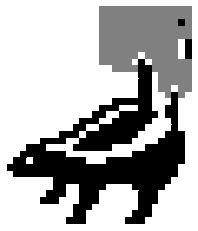

NESAITPAS


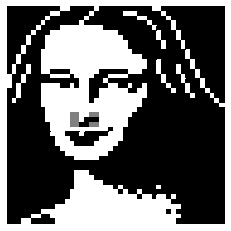

NESAITPAS


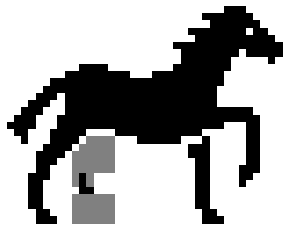

NESAITPAS


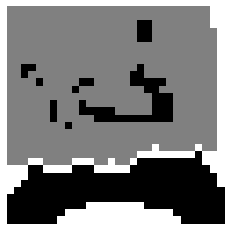

NESAITPAS


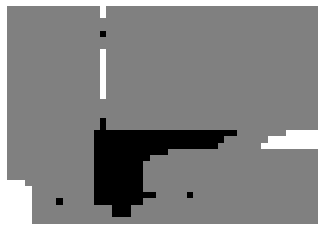

,
Instances 12-16,Temps de résolution de la méthode de propagation (secondes)
12.txt,2.399202
13.txt,3.665771
14.txt,2.821779
15.txt,1.629336
16.txt,7.000581


In [36]:
#question 14 propagation 12-16
dfp2 = pd.DataFrame(measure_time(propagation,12,16), columns = ["Instances 12-16", "Temps de résolution de la méthode de propagation (secondes)"])
dfp2 = dfp2.set_index( ["Instances 12-16", "Temps de résolution de la méthode de propagation (secondes)"] )
dfp2

NESAITPAS


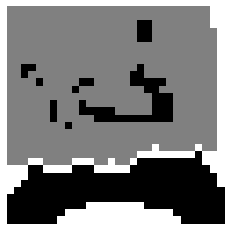

<Figure size 432x288 with 0 Axes>

In [31]:
#question 14 instance 15 propagation
propagation("15.txt")
plt.savefig("instance15-propagation.png",dpi=300)

VRAI


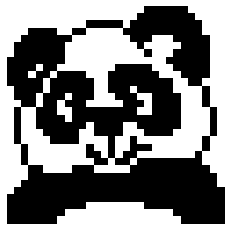

<Figure size 432x288 with 0 Axes>

In [32]:
#question 14 instance 15 res_complete
resolutionComplete("15.txt")
plt.savefig("instance15-rc.png",dpi=300)